# <center>Online Retail Project</center>

***

# <center>Introduction</center>

***

This analysis is to look through an online retail dataset, the catch is this dataset has very little information behind it. The only clue I must go off of is the problem statement, which is 'Provide solutions to help make this company more successful'. The goal of this analysis is to find connections between data points by performing EDA, removing outliers, filtering specific data points, finding correlation and much more. By the end of this analysis, I will come up with solutions and tactics this company can implement.

## Dataset

The dataset is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011.

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

Source: https://www.coursera.org/projects/using-python-data-analyst?page=1

***

### Load the Data

***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Online Retail.xlsx')

***

# <center>EDA / Data Cleaning</center>

I start by performing simple EDA looking through the data, finding duplicate rows, missing values, and trying to see what kind of data we are working with.

***

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


>*Note: Note: This dataset doesn’t include any way of knowing which type of currency the 'UnitPrice' is. I dont want to make any assumptions so I will stick with calling it either 'UnitPrice' or 'Currency'.*

***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


***

### Finding duplicates

In [5]:
dup_rows = df[df.duplicated()]
dup_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

>All duplicate rows are now dropped.

***

### Missing Values

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

>The only missing values we have is in the description and customer ID columns. Normally I would like to drop these missing values as soon as possible. But, since these are both object columns(I’m treating employee ID as an object since i dont want to perform mathematics on an ID), I will leave them in just in case I decide to actually drop the columns themselves later on.

***

# <center>Analysis: With Outliers</center>

Now that we have an idea of the shape and layout of the data, next I’ll go more in-depth by looking at the descriptive statistics. Finding out how the data is distributed is a necessary part before moving on to outlier removals.

***

### Descriptive Statitcs

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


>Here you can see that we are working with some spread out data. Starting with ‘Quantity’, while the mean is 9.6, the std, which measures how far out the data points are from the mean, is 219. This indicates that there may be some outliers of errors in this data. Moving down to the minimum, maximum, and quartiles, we can see why the std is so high. The minimum is -80995, and by comparing that to the mean, we can immediately tell that there will be issues if we dont find out what’s going on. Something interesting is the max is just the abs version of the min, again, this is something that we will need to answer. 

>One thing to note is the 75th percentile is 10, meaning that 75% of this data is either equal to or below this value, which helps us understand that the massive range from the min and max doesn’t seem to hold true for most of the data point.

>Same story with ‘UnitPrice’, a mean of 4.6 but a std of 97. Also having the occurrences of a min and max that are vastly lower and bigger than the mean.

***

### Histogram

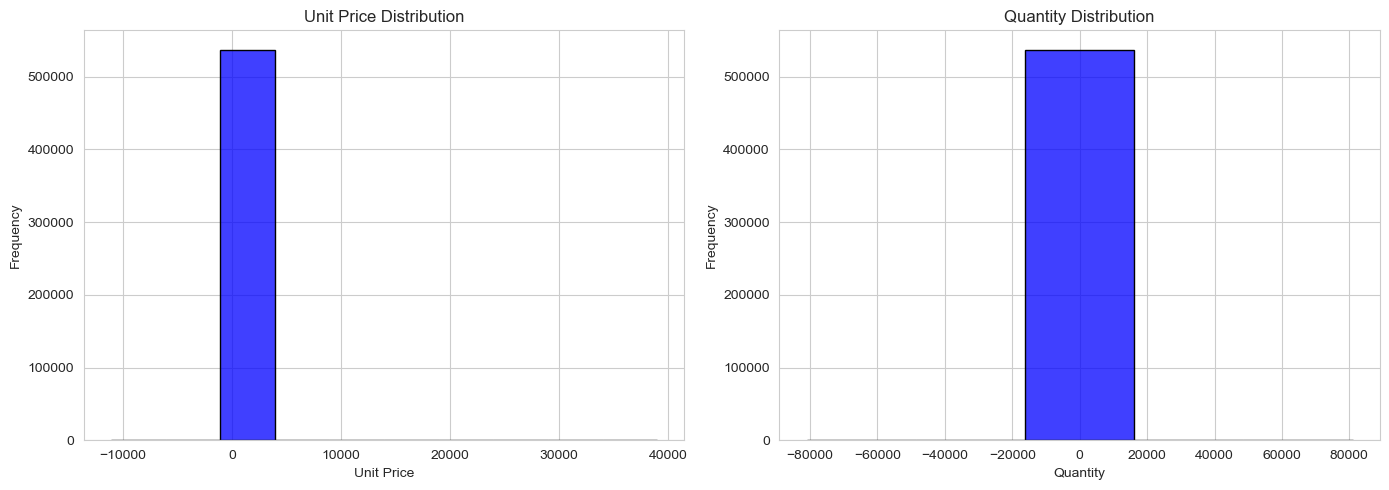

In [9]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.histplot(df['UnitPrice'], bins=10, ax=axes[0], color="blue", edgecolor='black')
axes[0].set_xlabel('Unit Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Unit Price Distribution')

sns.histplot(df['Quantity'], bins=5, ax=axes[1], color="blue", edgecolor='black')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Quantity Distribution')

plt.tight_layout()
plt.show()

***

### Box Plot

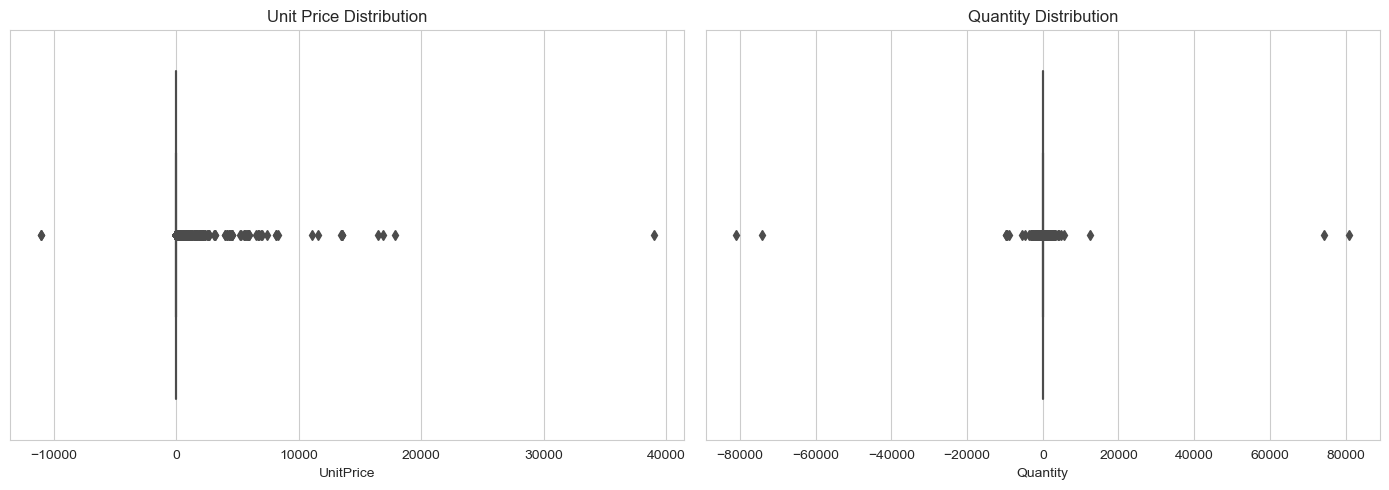

In [10]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1) 
sns.boxplot(x=df['UnitPrice'], color = 'blue')
plt.title('Unit Price Distribution')

plt.subplot(1, 2, 2)  
sns.boxplot(x=df['Quantity'], color = 'blue')
plt.title('Quantity Distribution')

plt.tight_layout()
plt.show()

>Both the graphs are a great way to visualize the descriptive statictics that we were going over. With the histogram being a single thick bar shows that most data points linger around that area, meaning the rest of the bars are to short and thin to even visualize.

>The box plots tell the same story. The box itself is so thin you can’t even see the boxes' contents. These plots are riddled with outliers shown by the black diamonds spaced out. Instead of immediately removing the outliers, I want to dig a bit deeper to see why we have them in the first place. Next I’ll use some code to find the top 10 and bottom 10 data points from the categories.

***

### Largest and Smallest Quantites

In [11]:
top_largest_quantity = df.nlargest(10, 'Quantity')
top_largest_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
74614,542504,37413,NaN,5568,2011-01-28 12:03:00,0.00,NaN,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
220843,556231,85123A,?,4000,2011-06-09 15:04:00,0.00,NaN,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom


In [12]:
top_lowest_quantity = df.nsmallest(10, 'Quantity')
top_lowest_quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,NaN,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.00,NaN,United Kingdom
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.00,NaN,United Kingdom
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2011-10-31 15:17:00,0.00,NaN,United Kingdom
341601,566768,16045,NaN,-3667,2011-09-14 17:53:00,0.00,NaN,United Kingdom
323458,565304,16259,NaN,-3167,2011-09-02 12:18:00,0.00,NaN,United Kingdom


>If you remember the min and max value for Quantity before, this explains it. We see the top and bottom have the same stock code, description, unit price, and customer id. Also, the invoice numbers and index numbers are close by. Since the quantity is the is the same(ones positive and one’s negative), we can theorize that this is a return. The date is also the same, and the time is very close together. This also shows us some of the missing values and NaN for description and customer ID.


***

### Largest and Smallest Unit Price

In [13]:
top_largest_prices = df.nlargest(10, 'UnitPrice')
top_largest_prices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:35:00,11586.50,NaN,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


In [14]:
top_lowest_prices = df.nsmallest(10, 'UnitPrice')
top_lowest_prices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.00,NaN,United Kingdom


>Looking at both the upper range and lower range of price, we notice:
>- Descriptions either reading "Adjust bad debt', 'AMAZON FEE', or 'NaN'
>- Negative quantities
>- A quantity of '56' but a price of 0
>- Prices above 10,000 and below 11,000
>- Stock code 'M' is for manual, and 'B' is for 'Adjust bad debt'

>Judging from the prices, negative quantities, and comparing these to the summary statictics, I can confidently say we are either working with outliers or errors. Looking back at the min and max values of the descriptive statistics, these values dont look like sales. They seem they are either manually inputted in or a reoccurring payment based on the fact the descriptions are 'Manual' and 'AMAZONFEE'.

>We can see from the description column that returns could possibly just be a small part of the negative prices. You can see on the top row that 'Adjust bad debt' is in the description, which could possibly mean that a customer’s payment failed to go through. We can help confirm this because the quantity is 1 and has a negative price. the quantity would only be negative if the product was a return. So, since the quantity isn’t negative, but the price is negative, this was probably a payment that failed to go through.

>Since I dont have direct interaction with the owner of this dataset, I’m going to leave these in incase they help my analysis in the future. Once we get to removing outliers, then ill figure out what to do with them.

>Now, so can understand just how many negative values are returns, I’ll make a code the finds each instance of the same ‘CustomerID’, ‘StockCode’, ‘Unitprice’, and the absolute Quantity. I understand since we are missing some customer Ids, that we might not catch all the returned sales, but doing this will at least help understand what kind of proportion of the sales are returns.

***

### Returned Sales

In [15]:
merged_data = pd.merge(df, df, 
                       left_on=['CustomerID', 'StockCode', 'UnitPrice', abs(df['Quantity'])],
                       right_on=['CustomerID', 'StockCode', 'UnitPrice', abs(df['Quantity'])])

matched_transactions = merged_data[
    (merged_data['Quantity_x'] > 0) & 
    (merged_data['Quantity_y'] < 0)
]

matched_transactions = matched_transactions[['CustomerID', 'StockCode', 'Description_x', 'UnitPrice', 'Quantity_x', 'Quantity_y', 'Country_x']]

matched_transactions


,CustomerID,StockCode,Description_x,UnitPrice,Quantity_x,Quantity_y,Country_x
1392,17850.0,22632,HAND WARMER RED POLKA DOT,1.85,6,-6,United Kingdom
1409,17850.0,22632,HAND WARMER RED POLKA DOT,1.85,6,-6,United Kingdom
1426,17850.0,22632,HAND WARMER RED POLKA DOT,1.85,6,-6,United Kingdom
1443,17850.0,22632,HAND WARMER RED POLKA DOT,1.85,6,-6,United Kingdom
1460,17850.0,22632,HAND WARMER RED POLKA DOT,1.85,6,-6,United Kingdom
...,...,...,...,...,...,...,...
3511975,15525.0,23494,VINTAGE DOILY DELUXE SEWING KIT,5.95,1,-1,United Kingdom
3512004,15525.0,23079,TOADSTOOL BEDSIDE LIGHT,8.95,1,-1,United Kingdom
3512977,15877.0,16169E,WRAP 50'S CHRISTMAS,0.42,100,-100,United Kingdom
3512981,15877.0,22959,WRAP CHRISTMAS VILLAGE,0.42,25,-25,United Kingdom


>Since 5,949 rows came back and our data is well over 500,000 rows, we can tell that returned sales doesn’t even hit 1% of the full dataset, before moving on, I still want to know which country returns the most the product. Knowing this could help us answer any questions we may have while continuing this analysis.

***

### Summing Up the Returned Sales for Each Country

In [16]:
matched_transactions['TotalPrice'] = matched_transactions['UnitPrice'] * matched_transactions['Quantity_x']

country_summary = matched_transactions.groupby('Country_x').agg(Transactions=('TotalPrice', 'count'),
                                                                    TotalSpend=('TotalPrice', 'sum')).reset_index()
country_summary

,Country_x,Transactions,TotalSpend
0,Australia,72,1183.91
1,Bahrain,1,205.74
2,Belgium,7,113.65
3,Channel Islands,1,293.00
4,Cyprus,4,743.29
5,Czech Republic,2,71.52
6,Denmark,3,130.10
7,EIRE,487,36452.22
8,Finland,6,400.00
9,France,144,5055.40


In [17]:
country_summary['TotalSpend'].sum().round(2)

574817.03

>The UK has returned the majority of product, with all countries total returns equating to roughly 575,000 of the unspecified currency. Let’s visualize this so we can see just how big of a proportion it actually holds.

***

### Bar Chart: Country Summary of Returned Sales

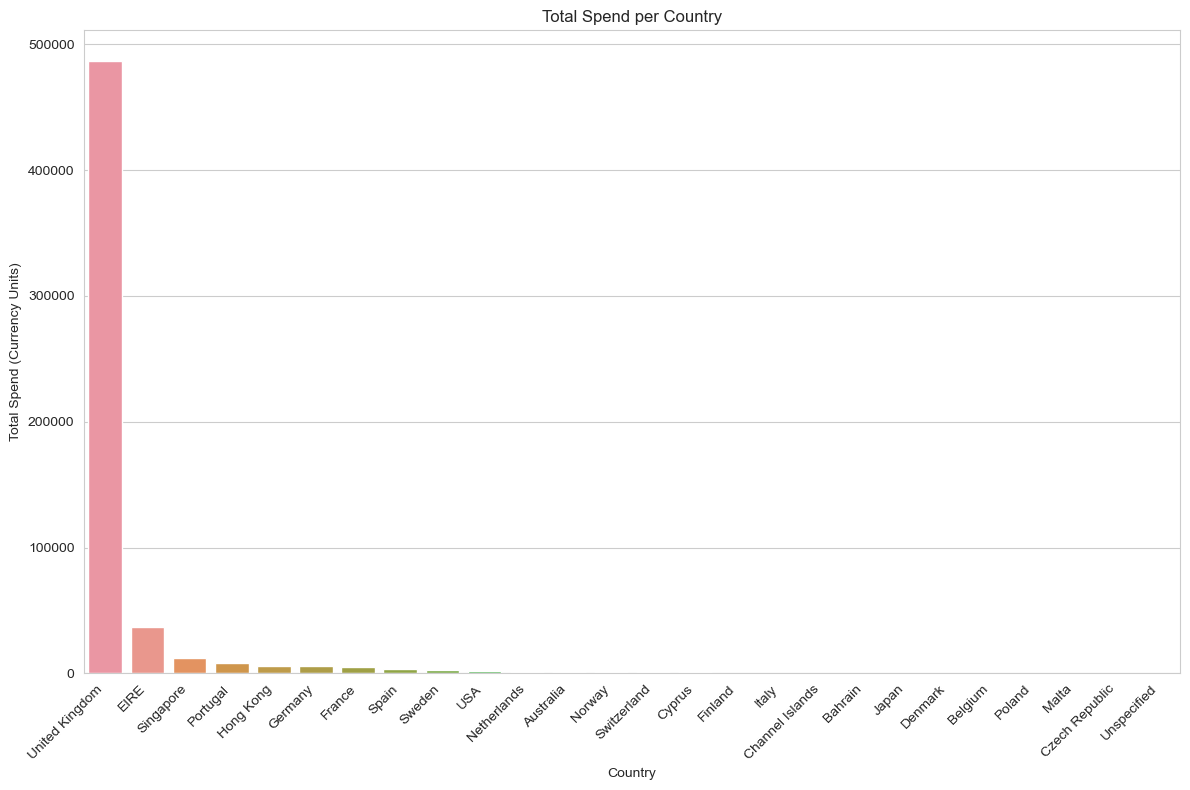

In [18]:
sorted_country_summary = country_summary.sort_values(by='TotalSpend', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(data=sorted_country_summary, x='Country_x', y='TotalSpend')
plt.title('Total Spend per Country')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Total Spend (Currency Units)')

plt.tight_layout()
plt.show()

>So, the UK has the vast number of returns compared to all other countries, which indicates that this store might be UK based, even though its online. Since we have isolated the returned sales, now it time to sum up the actual sales by country.

***

### Finding the Total Profit for each Country

Now I’ll be checking the total profit by each country, since the negative quantities will cancel out the returns when we multiply.

In [19]:
profit_by_country = df.groupby('Country').apply(
    lambda group: (group['UnitPrice'] * group['Quantity']).sum()
).reset_index()

profit_by_country.columns = ['Country', 'TotalProfit']
profit_by_country = profit_by_country.sort_values(by='TotalProfit', ascending=False)
profit_by_country

,Country,TotalProfit
36,United Kingdom,8167128.184
24,Netherlands,284661.540
10,EIRE,262993.380
14,Germany,221509.470
13,France,197317.110
0,Australia,137009.770
33,Switzerland,56363.050
31,Spain,54756.030
3,Belgium,40910.960
32,Sweden,36585.410


***

### Bar Chart: Profit by Country 

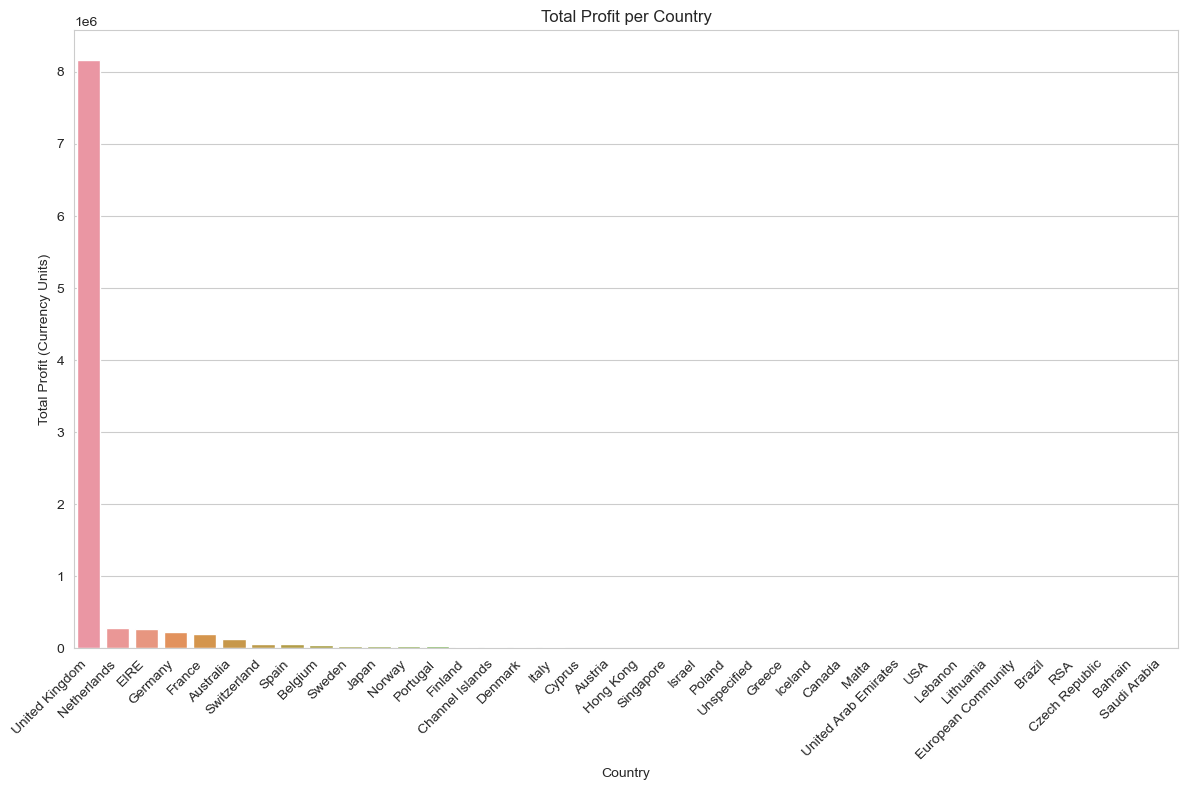

In [20]:
sorted_country_summary = profit_by_country.sort_values(by='TotalProfit', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

sns.barplot(data=profit_by_country, x='Country', y='TotalProfit')
plt.title('Total Profit per Country')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Total Profit (Currency Units)')

plt.tight_layout()
plt.show()

>As stated in the previously, judging by the UKs amount of involvement with this company, we could safely assume this is a UK based company. Even with the country in second place, Netherlands, they dont come close to the sheer amount of volume that the UK produces.

***

# <center>Filling in the Missing Values</center>

***

In [21]:
df[['CustomerID', 'Description']] = df[['CustomerID', 'Description']].fillna('unknown')

In [22]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

>After filling up the missing values with 'unknown' allows us to keep rows that may contain essential data.

***

# <center>Removing Outliers</center>

Since we have a good look at the data with the outliers present, I’ll use the IQR method for removing those outliers so we can have a clearer look at how our data is distributed.

***

### Checking Data Types

In [23]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

***

### IQR

In [24]:
Q1_price = df['UnitPrice'].quantile(0.25)
Q3_price = df['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
cleaned_price_df = df[(df['UnitPrice'] >= lower_bound_price) & (df['UnitPrice'] <= upper_bound_price)]

Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity
cleaned_quantity_df = cleaned_price_df[(cleaned_price_df['Quantity'] >= lower_bound_quantity) & (cleaned_price_df['Quantity'] <= upper_bound_quantity)]

df['UnitPrice'] = cleaned_quantity_df['UnitPrice']
df['Quantity'] = cleaned_quantity_df['Quantity']

>I’m only removing the quantitative data since everything else in this data can be considered qualitative (including dates for the context of this analysis). If you’re not familiar with the Inter Quartile Range(IQR), I’ll go over what this code does. 

>First, we find the 25th and 75th Percentile (1st and 3rd quartile) of the specified data, to find the IQR we subtract the 3rd quartile and 1st quartile.

>The next step is to find the lower and upper bound of the IQR (its widely recognized to use 1.5 as the constant). We then take the 1st quartile and subtract the constant multiplied by the IQR to find the lower bound. then the same steps for repeated for the upper bound, the 3rd quartile, but now we add instead of subtracting.

>Finally, the outlier free data is found by making sure the specified data is greater than the lower bound values and less than the upper bound values. After performing this we should be able to visualize our data in a much more meaningful way.

***

### Counting Values

In [25]:
df.count()

InvoiceNo      536641
StockCode      536641
Description    536641
Quantity       439135
InvoiceDate    536641
UnitPrice      439135
CustomerID     536641
Country        536641
dtype: int64

>Now you can see that both the quantity and unit price have lost values due to performing the IQR. The next step is to remove the rows with the na values present.

***

### Droping NA Values

In [26]:
df.dropna(inplace=True)

In [27]:
df.count()

InvoiceNo      439135
StockCode      439135
Description    439135
Quantity       439135
InvoiceDate    439135
UnitPrice      439135
CustomerID     439135
Country        439135
dtype: int64

> All the columns have the same amount of data, now we can perform an analysis that is free of outliers.

***

# <center>Analysis: Post-Outliers</center>

In this section I will be performing another round of EDA, looking at everything from the best performing months to top selling products and most reoccurring customers.

***

### Descriptive Statistics

In [28]:
df.describe()

,Quantity,UnitPrice
count,439135.000000,439135.000000
mean,4.833596,2.700595
std,4.624864,1.932749
min,-12.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,8.000000,3.750000
max,23.000000,8.330000


> The descriptive statistics show a lot more clarity now, as opposed to the statistic’s pre-outlier removal. The min still has a negative quantity, which indicates returns are still a part of this dataset. Looking at the unit price min, helps build confidence that all the negative quantity numbers should be actual returns. If we still had negative prices, that would mean we could have possibly had more 'Adjust bad debt' columns.

>But considering quantity has a max of 23, that still seems like it should be an odd one considering 75% of the data is equal to or less than 8. We will be able to visualize this in the next step.

>The standard deviations also went down significantly, indicating that these data points are much closer together.

***

### Distribution of Data: Histogram

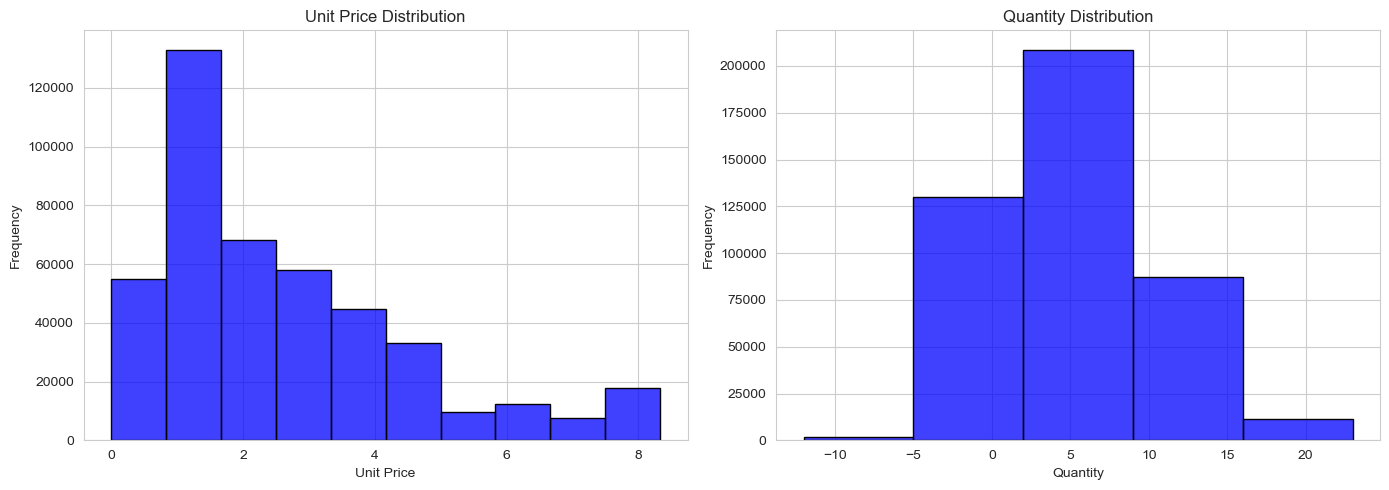

In [29]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.histplot(df['UnitPrice'], bins=10, ax=axes[0], color="blue", edgecolor='black')
axes[0].set_xlabel('Unit Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Unit Price Distribution')

sns.histplot(df['Quantity'], bins=5, ax=axes[1], color="blue", edgecolor='black')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Quantity Distribution')

plt.tight_layout()
plt.show()

### Distribution of Data: Box Plot

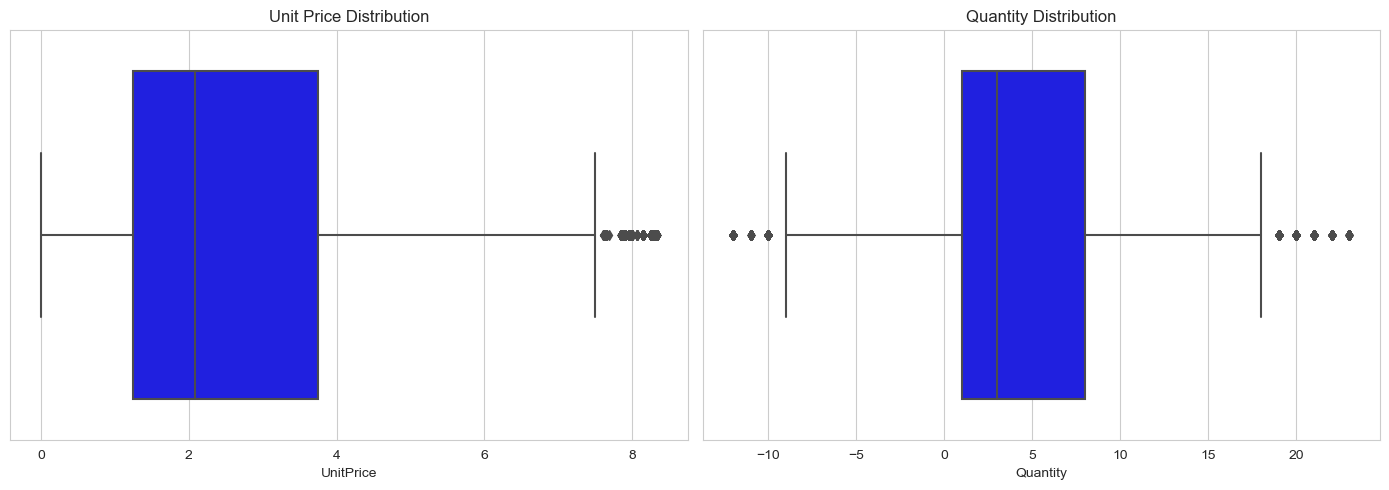

In [30]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1) 
sns.boxplot(x=df['UnitPrice'], color = 'blue')
plt.title('Unit Price Distribution')

plt.subplot(1, 2, 2)  
sns.boxplot(x=df['Quantity'], color = 'blue')
plt.title('Quantity Distribution')

plt.tight_layout()
plt.show()

>The removal of outliers is significant, now we can see the distribution of the data. Unit price is heavily right skewed, as shown by the plots. Most prices are within the 1 to 2 currency range. 

>Even though the IQR method didn’t remove every outlier, this is expected since this is sales data, which isn’t always evenly distributed. the outliers were confirmed in the descriptive statistics, as shown by the unit prices 75th percentile being 3.7 and max of 8.3, and the quantity 75th percentile being 8 with a max of 23.

***

### Making New Column: 'TotalPrice'

In [31]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

> This new column allows us to adjust for returns since we are multiplying the unit price and quantity.

### Sum of Total Price by Country

In [32]:
country_expenditure = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

country_expenditure

Country
United Kingdom          4084425.704
Germany                  120057.780
France                   105150.310
EIRE                      99910.620
Spain                     26390.270
Switzerland               25580.510
Belgium                   25337.810
Portugal                  18753.560
Norway                    14055.200
Netherlands               11711.420
Italy                     11479.180
Channel Islands           10636.330
Australia                 10120.370
Finland                    9428.750
Cyprus                     7002.980
Austria                    5767.190
Denmark                    5267.400
Singapore                  4261.080
Poland                     4182.920
Sweden                     4051.130
Hong Kong                  3925.890
Israel                     3433.440
Unspecified                3355.140
Greece                     2878.510
Iceland                    2866.770
Canada                     1670.600
Malta                      1325.880
United Arab Emirates

>UK is still dominating in terms of profit for this company. The UK holds about 88% of the total profits.

***

### Monthly Sum of Total Price: Line Chart

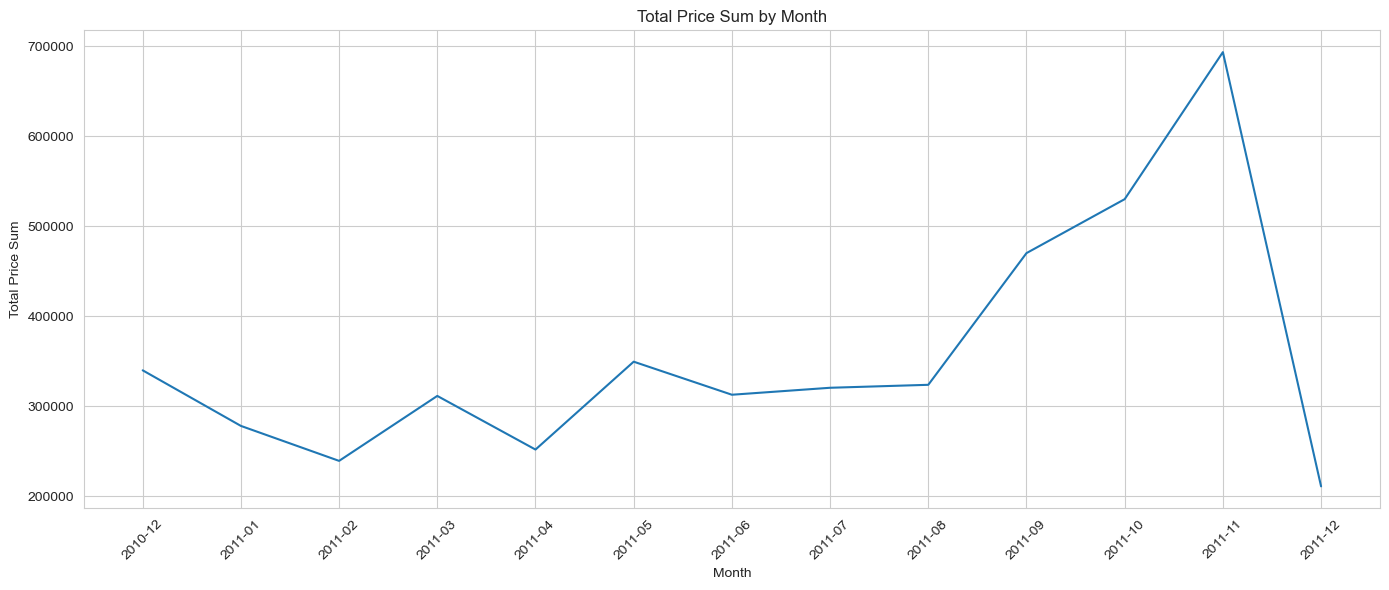

In [35]:
df['YearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')
monthly_sum = df.groupby('YearMonth').agg(TotalPriceSum=('TotalPrice', 'sum')).reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sum, x='YearMonth', y='TotalPriceSum')
plt.xticks(rotation=45)
plt.title('Total Price Sum by Month')
plt.ylabel('Total Price Sum')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

***

### Monthly Sum of Total Price: Table

In [36]:
monthly_sum = df.groupby('YearMonth').agg(
    TotalPriceSum=('TotalPrice', 'sum'),
    QuantitySum=('Quantity', 'sum')
).reset_index()

monthly_sum.sort_values(by='TotalPriceSum', ascending = False)

,YearMonth,TotalPriceSum,QuantitySum
11,2011-11,693366.340,321499.0
10,2011-10,529987.160,247098.0
9,2011-09,470042.982,217857.0
5,2011-05,349407.510,155719.0
0,2010-12,339813.740,139559.0
8,2011-08,323714.060,152433.0
7,2011-07,320420.671,153609.0
6,2011-06,312682.920,144419.0
3,2011-03,311367.920,141285.0
1,2011-01,278049.740,128444.0


>The sum tells us the highest number of products sold during November and October, which could include holiday shopping. But if that’s the case, why is December in 5th place? If we had more than one type of stock code per row, we could clarify this. For example, with every purchase you could include 'D' for discount, this way we could see what percentage of sales were based on having a discount. Other examples would be using 'P' for promotion, 'DOD' for 'deal of the day', 'R' for reoccurring purchase (subscription based), or 'NA' if there’s no incentive and the product is bought 'as it'. Having the separate codes could help adjust any sales tactics.

>Figuring out what kind of products are their top sellers could help us understand as to why most of the months aren’t as powerful as November. They seem to sell more products during late summer to early winter, than any other time.

***

## Top Selling Products

In [37]:
top_selling_products = df.groupby(['Description', 'StockCode']).agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalSales=('TotalPrice', 'sum')
).sort_values(by='TotalQuantity', ascending=False).head(5)

top_selling_products

,,TotalQuantity,TotalSales
Description,StockCode,,
JUMBO BAG RED RETROSPOT,85099B,13930.0,32054.02
ASSORTED COLOUR BIRD ORNAMENT,84879,10915.0,19027.31
WHITE HANGING HEART T-LIGHT HOLDER,85123A,10626.0,32570.18
LUNCH BAG RED RETROSPOT,20725,10374.0,19547.03
LUNCH BAG BLACK SKULL.,20727,8103.0,15892.26


> After doing research, it seems like the top selling product, 'JUMBO BAG RED RETROSPOT' is a reusable grocery bag. For an online retail business that seems a bit odd, unless they ship one with specific order types. Since the quantity is so high it seems it might be a bundled item with other products. Again, for an online retail business, this might be something to investigate.

>We can see that the top selling item isn’t the only bag in this list, we have 3 bag types in the top selling items. With items such as ornaments and decorations, which means that this could possibly be an online retail department store, such as a 'Ross' or 'Marshalls'. This could also be a wholesaler that sells to smaller businesses. Without any knowledge of the company’s name or further details, we can only make assumptions.

***

## Lowest Selling Products

In [38]:
lowest_selling_products = df.groupby(['Description', 'StockCode']).agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalSales=('TotalPrice', 'sum')
).sort_values(by='TotalSales', ascending=True).head(5)

lowest_selling_products

,,TotalQuantity,TotalSales
Description,StockCode,,
POSTAGE,POST,-8.0,-116.56
SAMPLES,S,-16.0,-82.18
WOODEN BOX ADVENT CALENDAR,35400,-8.0,-63.60
WHITE CHERRY LIGHTS,79323W,-8.0,-54.00
HANGING RIDGE GLASS T-LIGHT HOLDER,21655,-24.0,-40.56


> The lowest selling items aren’t actually items themselves but returns and samples. The 'Postage' helps confirm this. 'Postage' could also mean that this is the companies shipping costs. Even if we knew which one it was, we would still need to wonder why the total quantity is so low. If this company used 'Postage' for either returns or shipping’s costs, wouldn’t the quantity be higher? having only 116.56 for shipping costs or retuned items is a bit unrealistic for a business of this size. 

>Same for 'Samples'. If you giving away samples of items, why would you only give away 16 of them? Having more detail on these stock codes is necessary for a thorough analysis.

>In the next section ill filter for the stocks codes that only include letters.

***

## Returns Based on Non-Numeric Stock Codes

Since the main stock codes are numbers for sales, and numbers with a single letter for returns from the same client. I decided to look for stock number that are strictly letters, that way we can see how much of the percentage of stock codes they make up.

In [39]:
df_copy = df.copy()

df_copy['StockCode'] = df_copy['StockCode'].astype(str)

letters_only = df_copy[~df_copy['StockCode'].str.contains(r'\d')]

returns_summary = letters_only[letters_only['TotalPrice'] < 0].groupby('StockCode').agg(
    Description=('Description', 'first'),  
    NumReturnTransactions=('InvoiceNo', 'count'),
    TotalReturnValue=('TotalPrice', 'sum')).reset_index()

returns_summary

,StockCode,Description,NumReturnTransactions,TotalReturnValue
0,AMAZONFEE,AMAZON FEE,1,-1.00
1,CRUK,CRUK Commission,1,-1.60
2,D,Discount,2,-11.76
3,DOT,DOTCOM POSTAGE,1,-3.29
4,M,Manual,48,-299.35
5,POST,POSTAGE,50,-232.12
6,S,SAMPLES,16,-82.18


>'M', 'POST', and 'S' seem to be the most reoccurring non-numeric stock codes. Since the quantities and price of the samples are the same as the 'lowest selling products' section, then they must strictly be 'free' samples. Post on the other hand is different than the 'lowest selling products' section, which shows they have some positive products that use 'POST' as a stock code, meaning that this most likely isn’t shipping costs, since there wouldn’t be any shipping costs that are positive.

>DOT seems to be another POSTAGE type stock code.

>DISCOUNT only occurs twice, this makes you wonder if they rarely give discounts, or if they dont usually input discount information at all. This goes back to my point about making a separate column for these types of stock codes.

***

## Top Returned Products

In [40]:
top_returned_products_all = df_copy[df_copy['TotalPrice'] < 0].groupby('Description').agg(
    NumReturnTransactions=('InvoiceNo', 'count')
).sort_values(by='NumReturnTransactions', ascending=False).head(10)

top_returned_products_all

,NumReturnTransactions
Description,
JAM MAKING SET WITH JARS,87
SET OF 3 CAKE TINS PANTRY DESIGN,71
ROSES REGENCY TEACUP AND SAUCER,51
POSTAGE,50
STRAWBERRY CERAMIC TRINKET BOX,50
Manual,48
RECIPE BOX PANTRY YELLOW DESIGN,45
GREEN REGENCY TEACUP AND SAUCER,40
LUNCH BAG RED RETROSPOT,39


In [41]:
product_summary = df_copy.groupby('Description').agg(
    NumReturnTransactions=('Quantity', lambda x: (x < 0).sum()), 
    TotalPositiveQuantitiesSold=('Quantity', lambda x: x[x > 0].sum())  
).sort_values(by='NumReturnTransactions', ascending=False).head(10)

product_summary

,NumReturnTransactions,TotalPositiveQuantitiesSold
Description,,
unknown,372,2441.0
JAM MAKING SET WITH JARS,87,5278.0
SET OF 3 CAKE TINS PANTRY DESIGN,71,3698.0
ROSES REGENCY TEACUP AND SAUCER,51,4595.0
STRAWBERRY CERAMIC TRINKET BOX,50,4421.0
POSTAGE,50,44.0
Manual,48,680.0
RECIPE BOX PANTRY YELLOW DESIGN,45,4242.0
GREEN REGENCY TEACUP AND SAUCER,40,4212.0


>The highest returned item seems to have the description which is 'unknown'. Meaning all items with no descriptions with unknown have been returned 372 time. Since 'unknown' could be the description across multiple different products, I won’t count this as an returned item. But this shows just how important it is to label the descriptions correctly.

>Two types of 'Teacups and Saucers' fall into the most returned items, this normally would be something to investigate, but considering only 51 were returned while 4595 were kept shows the overwhelming majority prefer to keep this product, since the return rate is only 1.1%.

>'POSTAGE' and 'Manual' show up again as categories, which shows that we need to find the reason for the descriptions.

***

## Most Sold 'Free' Items

In [42]:
free_items = df_copy[df_copy['UnitPrice'] == 0]

top_free_items = free_items.groupby('Description').agg(
    TotalQuantity=('Quantity', 'sum')
).sort_values(by='TotalQuantity', ascending=False).head(5)

top_free_items

,TotalQuantity
Description,
unknown,620.0
check,82.0
amazon,57.0
adjustment,55.0
found,53.0


>Based on this, it seems that most free items dont even have a description, considering 'unknown' is what I put when filling in any missing data. The rest of the items may not even be items at all. They could possibly be errors or wrong descriptions all together.

***

### Top Customers

In [43]:
top_5_customers = df.groupby(['CustomerID', 'Country']).agg(
    TotalSpent=('TotalPrice', 'sum')
).sort_values(by='TotalSpent', ascending=False).head(5)

top_5_customers

,,TotalSpent
CustomerID,Country,
unknown,United Kingdom,822013.98
14911.0,EIRE,73738.15
14096.0,United Kingdom,38289.06
17841.0,United Kingdom,30836.98
13089.0,United Kingdom,26504.54


> Due to the fact we have a lot of customer IDs grouped in the ‘unknown’ category, this means we aren’t collecting most customer IDs. These missing IDs total out to 822013 spent with the company. While it may be all these could be separate customers that got grouped, there could also be a very loyal customer who can’t get recognition. 

> What’s very interesting is the fact that Ireland has a customer that came in second place, this customer accounts for about 74% of Irelands total purchases with the company. This would be a great time to start a customer loyalty program, if not already implemented.

***

# <center>Analysis: Segmented</center>

In the final part of my analysis, I split the data frame up based on the unit price. If it’s positive it gets put in the positive_prices_df, if its negative it gets put in negative_prices_df, and if its 'free' it gets put in the free_items_df. The reason for this section is to plot charts and analyze each group separately to see if we can find any patterns within them.

***

# Positive Prices

***

### positive_prices_df

In [44]:
positive_prices_df = df[df['TotalPrice'] > 0]
positive_prices_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12


***

### Positive Prices Descriptive Statistics

In [45]:
positive_prices_df.describe()

,Quantity,UnitPrice,TotalPrice
count,431222.000000,431222.000000,431222.000000
mean,4.970444,2.705413,10.864197
std,4.515110,1.929738,11.542087
min,1.000000,0.001000,0.001000
25%,1.000000,1.250000,3.290000
50%,3.000000,2.080000,7.500000
75%,8.000000,3.750000,15.300000
max,23.000000,8.330000,191.590000


>- The average total price for items that are bought is around 11.
>- The total price std is large sense max spent was 191. Meaning there at the least one very big order, which would be the case for a quantity max of 23.

***

### Positive Prices: Histogram

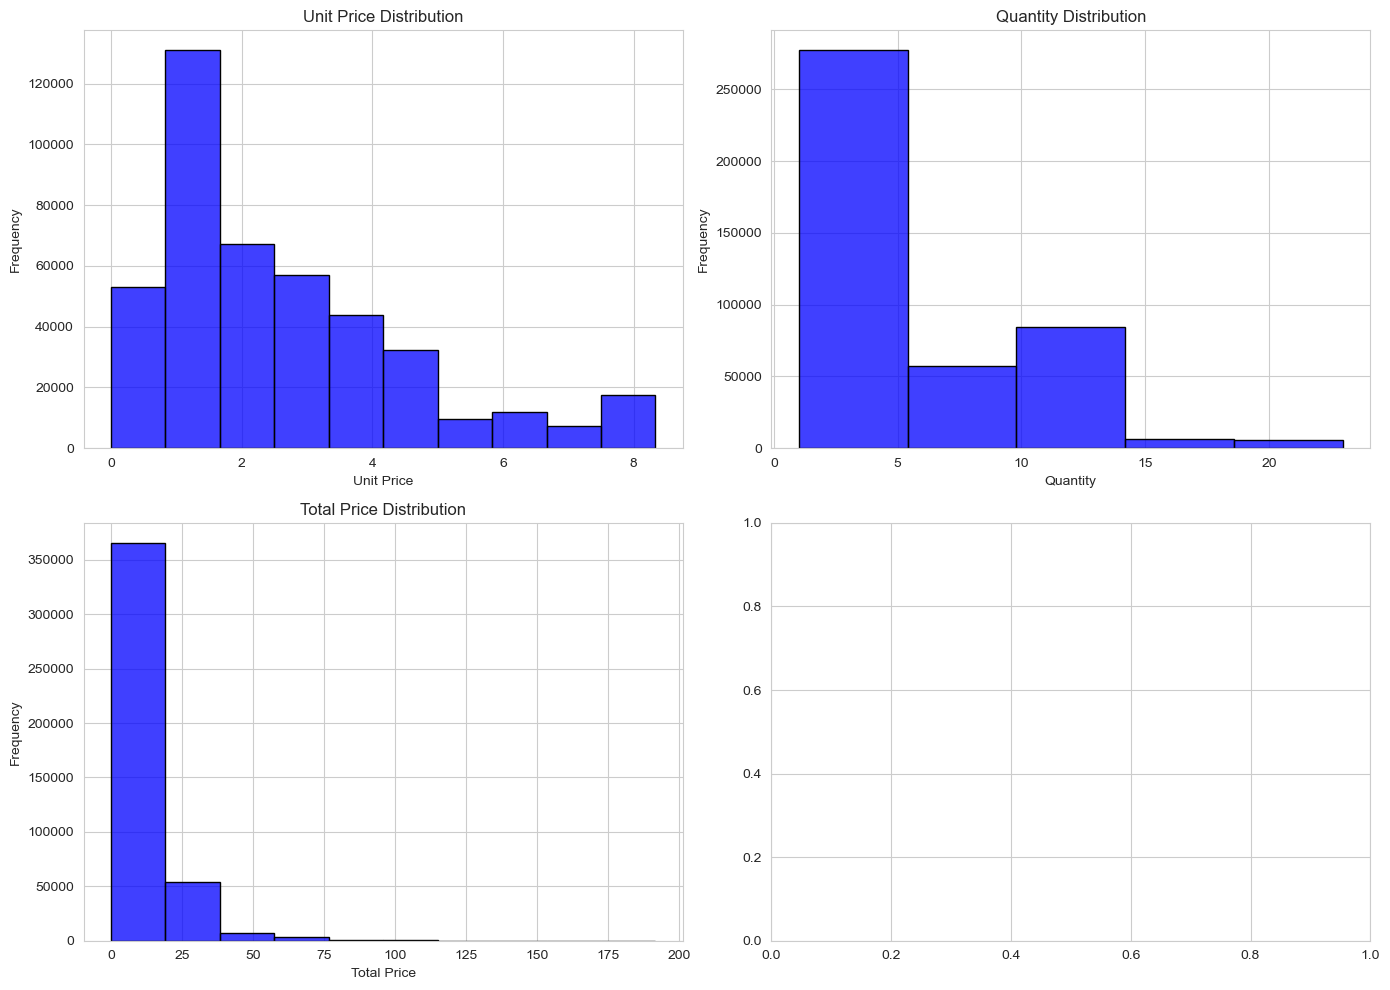

In [46]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

sns.histplot(positive_prices_df['UnitPrice'], bins=10, ax=axes[0, 0], color="blue", edgecolor='black')
axes[0, 0].set_xlabel('Unit Price')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Unit Price Distribution')

sns.histplot(positive_prices_df['Quantity'], bins=5, ax=axes[0, 1], color="blue", edgecolor='black')
axes[0, 1].set_xlabel('Quantity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Quantity Distribution')

sns.histplot(positive_prices_df['TotalPrice'], bins=10, ax=axes[1, 0], color="blue", edgecolor='black')
axes[1, 0].set_xlabel('Total Price')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Total Price Distribution')

plt.tight_layout()
plt.show()

>All these categories are right skewed, which is a good indicator we still have values on the high end causing this to happen (as mentioned in the descriptive statistics). The total price for example, likes to stick within the 0 - 25 range, due to the mean being 10.8 and median being 15.3.

***

### Positive Prices: Sum of Total Price by Month, Bar Chart

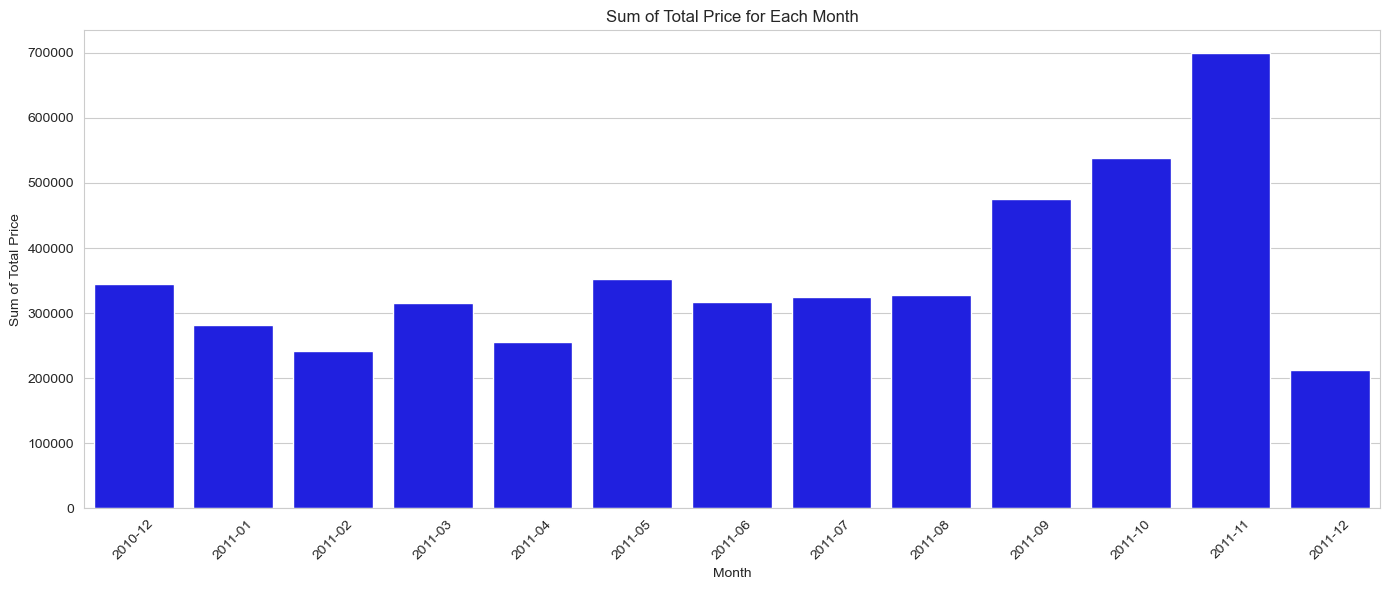

In [47]:
positive_prices_copy = positive_prices_df.copy()

positive_prices_copy['InvoiceDate'] = pd.to_datetime(positive_prices_copy['InvoiceDate'])

positive_prices_copy['Month'] = positive_prices_copy['InvoiceDate'].dt.strftime('%Y-%m')

monthly_totals = positive_prices_copy.groupby('Month').agg(TotalPrice_sum=('TotalPrice', 'sum')).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=monthly_totals, x='Month', y='TotalPrice_sum', color='blue')
plt.xticks(rotation=45)
plt.title('Sum of Total Price for Each Month')
plt.ylabel('Sum of Total Price')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

>- September, October, and November were the best-selling months for 2011.

>- December seems to have gotten less profit from 2010 and 2011.

***

### Positive Prices: Top Selling Products

In [48]:
top_selling_products = positive_prices_copy.groupby(['Description', 'StockCode']).agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalSales=('TotalPrice', 'sum')
).sort_values(by='TotalQuantity', ascending=False).head(5)

top_selling_products

,,TotalQuantity,TotalSales
Description,StockCode,,
JUMBO BAG RED RETROSPOT,85099B,14043.0,32280.62
ASSORTED COLOUR BIRD ORNAMENT,84879,10955.0,19094.91
WHITE HANGING HEART T-LIGHT HOLDER,85123A,10728.0,32874.08
LUNCH BAG RED RETROSPOT,20725,10498.0,19749.23
LUNCH BAG BLACK SKULL.,20727,8163.0,15989.86


>We can see these are the same top selling products from previously.

***

### Positive Prices: Lowest Selling Products

In [49]:
lowest_selling_products = positive_prices_copy.groupby(['Description', 'StockCode']).agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalSales=('TotalPrice', 'sum')
).sort_values(by='TotalQuantity', ascending=True).head(5)

lowest_selling_products

,,TotalQuantity,TotalSales
Description,StockCode,,
BLACKCHRISTMAS TREE 30CM,35597B,1.0,1.25
BLACK SQUARE TABLE CLOCK,84661b,1.0,4.96
"RUBY GLASS NECKLACE 42""",90068,1.0,7.50
LARGE TAHITI BEACH BAG,84856L,1.0,5.95
SILVER AND BLACK ORBIT NECKLACE,90014C,1.0,2.95


>One of the lowest selling products seems to be a Christmas tree, which could be a reason for the December months being having less sales than the other months.

>Interesting that bags seem to be some of the highest selling items, but the beach bag has such low sales. Considering the UK is the country where most of the customers are located, we can assume that many of them wouldn’t be interested in products that are summer orientated.

***

### Positive Prices: Top Countries

In [50]:
top_countries = positive_prices_copy.groupby('Country').agg(
    TotalSpent=('TotalPrice', 'sum')
).sort_values(by='TotalSpent', ascending=False).head(5)

top_countries

,TotalSpent
Country,
United Kingdom,4129257.404
Germany,122485.510
France,106044.190
EIRE,102728.620
Spain,26695.760


***

### Positive Prices: Correlation

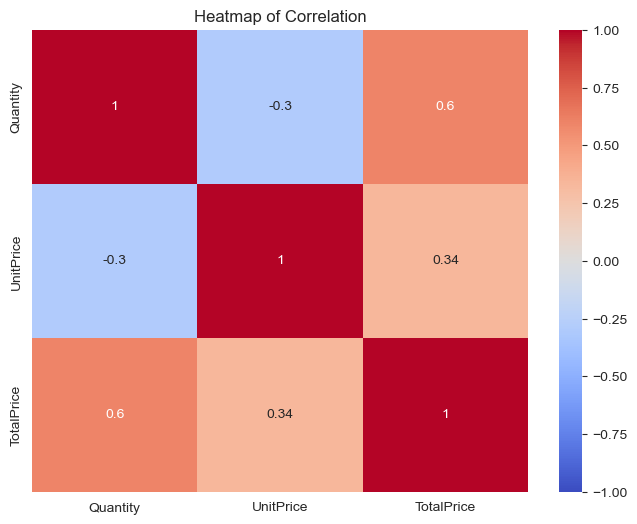

In [51]:
corr_matrix = positive_prices_copy.corr(numeric_only = True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation')
plt.show()

>Total Price and quantity seem to have a moderate positive correlation, which says when quality goes up, so does this price in most cases. This makes sense, buying more of something usually makes it a more expensive order.

>The slight negative correlation with unit price and quantity could be for a couple reasons:
>1. People dont tend to buy more expensive items. If they do buy expensive items, they aren’t in big quantities.
>2. Discounts: People might be enticed to buy in bulk if they get a better deal, this would help legitimize the theory about this online store being a wholesaler.

***

# Negative prices

***

### negative_prices_df

In [52]:
negative_prices_df = df[df['TotalPrice'] < 0]
negative_prices_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010-12
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010-12
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12.0,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,-41.40,2010-12
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12.0,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010-12
939,C536506,22960,JAM MAKING SET WITH JARS,-6.0,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,-25.50,2010-12
...,...,...,...,...,...,...,...,...,...,...
540176,C581470,23084,RABBIT NIGHT LIGHT,-4.0,2011-12-08 19:28:00,2.08,17924.0,United Kingdom,-8.32,2011-12
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12.0,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,-23.40,2011-12
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11.0,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,2011-12
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1.0,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,2011-12


***

### Negative Prices: Descriptive Statistics

In [53]:
negative_prices_df.describe()

,Quantity,UnitPrice,TotalPrice
count,6578.000000,6578.000000,6578.000000
mean,-3.402098,2.932777,-8.240204
std,3.413196,1.928951,8.870204
min,-12.000000,0.120000,-97.800000
25%,-4.000000,1.450000,-11.500000
50%,-2.000000,2.550000,-4.950000
75%,-1.000000,4.150000,-2.550000
max,-1.000000,8.290000,-0.120000


>- The largest return would be 12 items with a total price of 97

***

### Negative Prices: Histogram

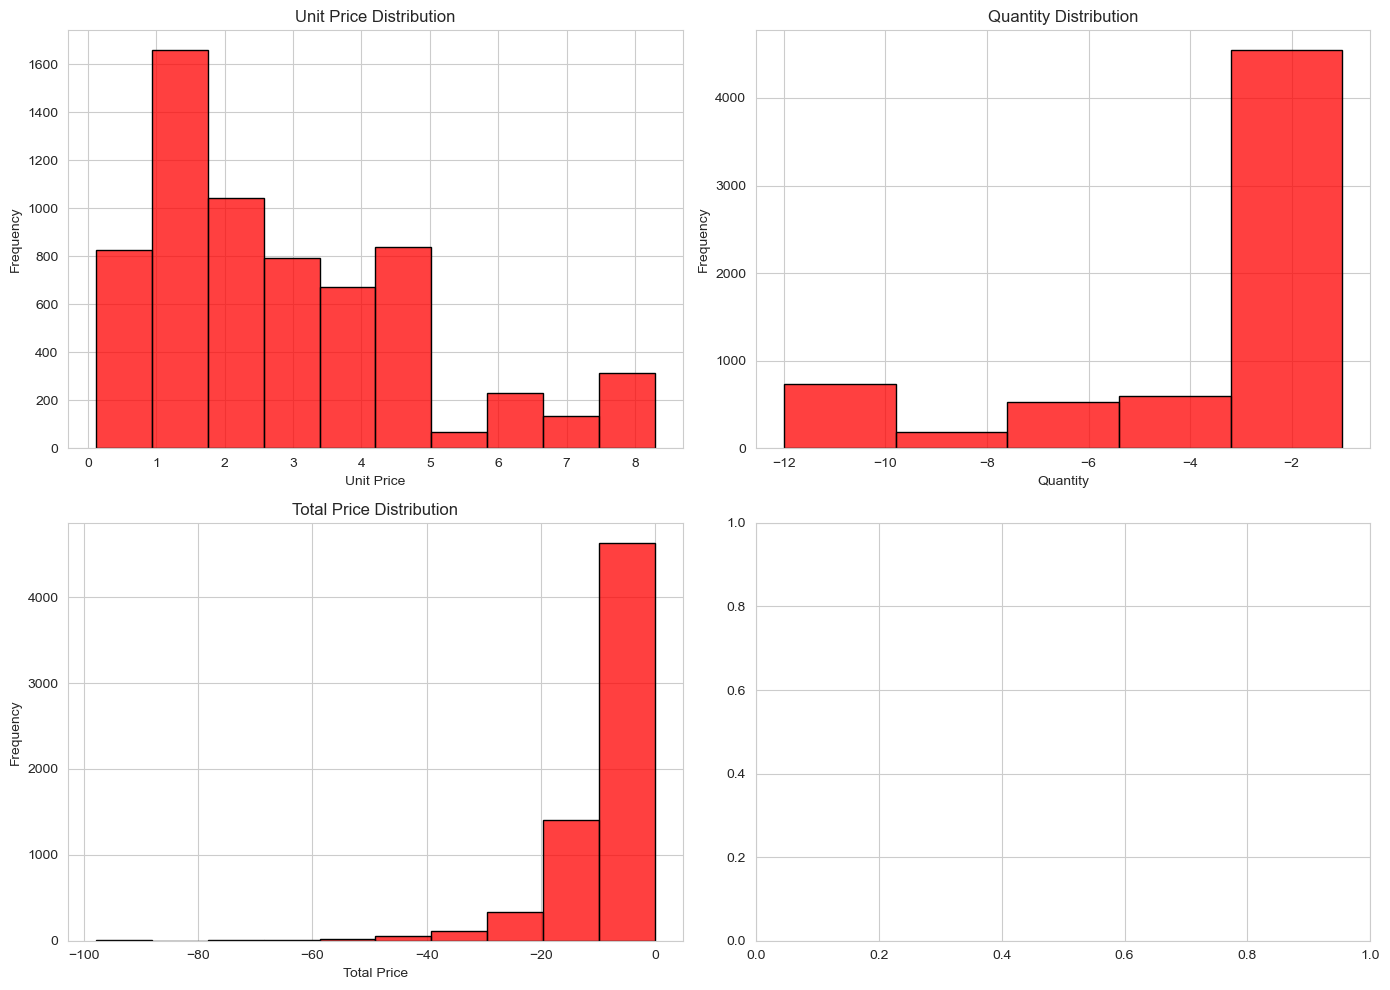

In [54]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

sns.histplot(negative_prices_df['UnitPrice'], bins=10, ax=axes[0, 0], color="red", edgecolor='black')
axes[0, 0].set_xlabel('Unit Price')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Unit Price Distribution')

sns.histplot(negative_prices_df['Quantity'], bins=5, ax=axes[0, 1], color="red", edgecolor='black')
axes[0, 1].set_xlabel('Quantity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Quantity Distribution')

sns.histplot(negative_prices_df['TotalPrice'], bins=10, ax=axes[1, 0], color="red", edgecolor='black')
axes[1, 0].set_xlabel('Total Price')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Total Price Distribution')

plt.tight_layout()
plt.show()

>What interesting here is that unit price still has a right skew while everything else is skewed left. When understanding the context, this makes sense. Since the price doesn’t change when you return an item, the price is still going to have a very similar distribution to the positive_prices_df. 

>The quantity and total price are left skewed since these are returned items, from before we could see that when an item is returned, the quantity is negative (which cancels out the previous order, making the system treat it as 0). Same goes for the total price, this essentially makes sure the system doesn’t read it as two separate orders.

***

### Negative Prices: Sum of Total Prices, Bar Chart

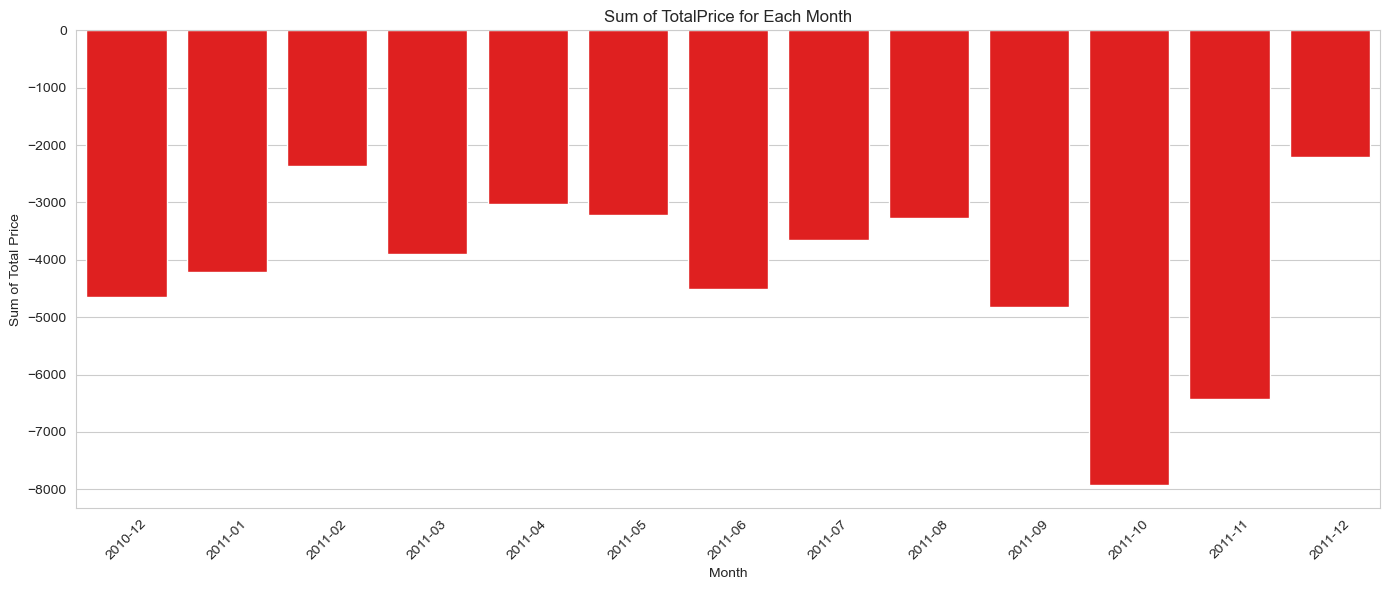

In [55]:
negative_prices_copy = negative_prices_df.copy()

negative_prices_copy['InvoiceDate'] = pd.to_datetime(negative_prices_copy['InvoiceDate'])

negative_prices_copy['Month'] = negative_prices_copy['InvoiceDate'].dt.strftime('%Y-%m')

monthly_totals = negative_prices_copy.groupby('Month').agg(TotalPrice_sum=('TotalPrice', 'sum')).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=monthly_totals, x='Month', y='TotalPrice_sum', color='red')
plt.xticks(rotation=45)
plt.title('Sum of TotalPrice for Each Month')
plt.ylabel('Sum of Total Price')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

> *Note: Though it may seem like this is a mirror image of the positive_price_df, keep in mind the scales are completely different.*

>November has the most returns during the year of 2011, considering that November is the most popular month for customers, this makes sense.

***

### Negative Prices: Correlation

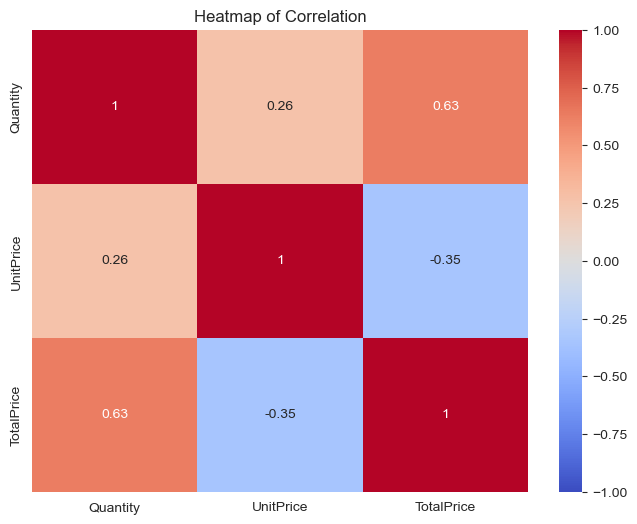

In [59]:
corr_matrix = negative_prices_copy.corr(numeric_only = True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation')
plt.show()

>The correlations looks about the same as the positive_prices_df, but slightly higher for the correlation between 'TotalPrice' and 'Quantity', along with 'TotalPrice' and 'UnitPrice',

***

# Free Items

***

In [60]:
free_items_df = df[df['TotalPrice'] == 0]
free_items_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth
1970,536545,21134,unknown,1.0,2010-12-01 14:32:00,0.0,unknown,United Kingdom,0.0,2010-12
1971,536546,22145,unknown,1.0,2010-12-01 14:33:00,0.0,unknown,United Kingdom,0.0,2010-12
1972,536547,37509,unknown,1.0,2010-12-01 14:33:00,0.0,unknown,United Kingdom,0.0,2010-12
1987,536549,85226A,unknown,1.0,2010-12-01 14:34:00,0.0,unknown,United Kingdom,0.0,2010-12
1988,536550,85044,unknown,1.0,2010-12-01 14:34:00,0.0,unknown,United Kingdom,0.0,2010-12
...,...,...,...,...,...,...,...,...,...,...
535326,581203,23406,unknown,15.0,2011-12-07 18:31:00,0.0,unknown,United Kingdom,0.0,2011-12
535331,581208,72801C,check,-10.0,2011-12-07 18:35:00,0.0,unknown,United Kingdom,-0.0,2011-12
535332,581209,21620,unknown,6.0,2011-12-07 18:35:00,0.0,unknown,United Kingdom,0.0,2011-12
535334,581211,22142,check,14.0,2011-12-07 18:36:00,0.0,unknown,United Kingdom,0.0,2011-12


***

### Free Items: Descriptive Statistics

In [61]:
free_items_df.describe()

,Quantity,UnitPrice,TotalPrice
count,1335.000000,1335.0,1335.0
mean,1.209738,0.0,0.0
std,6.329370,0.0,0.0
min,-12.000000,0.0,0.0
25%,-2.000000,0.0,0.0
50%,1.000000,0.0,0.0
75%,3.000000,0.0,0.0
max,23.000000,0.0,0.0


>Based on the descriptions, these dont seem like 'free items', again, these could be errors. But these also have stock codes and quantity counts, which indicates some type of transaction still took place. Normally I would talk to the owner of this dataset to see what these could mean. Since I dont have access to any owner, I will treat these as system errors, so I can keep this analysis as accurate as possible.

***

# <center>Conclusion</center>

***

The goal of this analysis was to explore the data, give descriptive statistics, and give solutions to some of the problems that I found. Unfortunately, with lack of information, I had to make assumptions about the data. After analyzing the data, I concluded that this online retail store is a wholesaler based in the UK. With a quantity average of 5, this means most of the time people are at least buying 5 items when they shop here, and with an average unit price of 2.7, most of these items are inexpensive. I think of this store as an 'Alibaba' where people buy in bulk, either to dropship or reselling. This is just my assumption, but based on the data, I have confidence in my answer. This goes to show how important is it to keep in contact with others who know how the dataset operates. 

In my next three sections, Limitations, Recommendations, and Next Steps, I go over different problems the arose during my analysis, how to fix those problems for the future, and what tips I have for them based on the data.

***

# <center>Limitations</center>

***

**Lack of data**

With only a year and one month of data, its causes making data-driven decisions not as accurate. Adding more data would allow us to test for seasonality and perform time series analysis. For example, November was the biggest month of 2011, but we can’t make an accurate prediction for next year without previous years data. Looking back at December of 2010 we see there was more sales during that month than December of 2011, so who’s to say that won’t happen with November of 2012? Adding more data will help us combat this issue.

The next point is to allow more than one stock code for a single row. For example, add the numeric code in one column, and add another column with the non-numeric one. The non-numeric stock codes could include D for discount, P for promotion, DOD for deal of the day and so on. Doing this would allow us to find different correlations between items and what kind events make them sell the most.

One more column type could also help describe this data a bit better, add a column for 'Order' and 'return', so viewers of the data can easily understand what the data is saying. 'O' for order and 'R' for return would have a positive impact on this dataset. Instead of making supposed return values have a negative quantity.

**No Contact With Dataset Owner**

One thing that could have helped with the lack of data would of been having contact with the owner of the dataset, or at the very least a legend for different types of stock codes, descriptions, etc. Due to this I had to make a lot of educated guesses on what certain terminology meant. For example, when there’s a negative quantity but there’s also a positive quantity that’s the same number, stock code, and customer ID, I took that as a returned product. Even though I feel very confident in my decision of doing so, I could’ve been completely wrong, it could’ve just turned out to be an error or mistype.

**Bias**

This could be considered a follow up to my previous statement, needing to assume things such as returned products results in bias. Even though I feel certain I’m correct, having another analyst look over my assumptions could build even more certainty in my findings.

***

# <center>Recommendations</center>

***

**Know Your Market**

Throughout all the countries that shop here, the UK dominates in terms of sales. Because of this, focusing on the UK is a must. Marketing strategies and new product introduction should be shown to UK based audiences before moving forward. Of course, dont ignore other markets, but from a financial standpoint you should be focusing on the market where 88% of the customers reside. The other top countries that shop here are Germany, France, and Ireland. Since all these countries are in Europe, a lot of these countries have a lot in common.

Keep in mind that you also have one customer from Ireland that makes up 74% of all sales from the country, so while one customer might not seem like a big deal, this would be a major hit. Here are my tips moving forward.

* UK has a lot of different sections, do some research about how to market to different sections. Once you determine what types of products are sold to each region, you can base your marketing strategy off that. Does a specific region prefer bags while another one prefers jewelry? If so, could you offer promotions or a 'Deal of the Day'?

<br>

* After you determine your advertising budget, figure out what strategy best suits your audience. Do your customers tend to younger? Instagram, snapchat, and twitter will be great places. Are they businesspeople looking to stock up on product? Try LinkedIn. Knowing what kind of audience is buying your product is the first step before running an ad campaign.

<br>

* Run a survey, surveys are a great a way to understand what a certain demographic is looking for, my advice is to either do a mail in survey or email survey. Surveys taken in public or door-to-door, can lead to people giving un-honest answers because they aren’t looking to hurt feelings even if the correct answer is what they need to hear.

**Control the inventory**

Following up with the previous statement, knowing the inventory is a must. For example, bags seem to be a top seller here, but when investigating the lowest sold items, we found another type of bag that was marketed as a 'beach bag'. Also, December tends to be a mediocre month for sales, which could explain why Christmas trees were also a low seller. Unfortunately, due to only having one year of data, making confident recommendations moving forward can be a bit complex. At the very least, once there is a couple more years, we can make a more confident recommendation, but for now:

* Go through your inventory catalog, understand who you’re trying to sell this product to. As mentioned above, someone from Europe would have a hard time being interested in buying summer bags. Just like someone from Florida wouldn’t want to buy winter gear.

**Customer Loyality**

Having customer loyalty is a great thing, but if they dont feel appreciated, what’s stopping them from leaving? If you dont already have a customer loyalty program in place, then there should be. As I’ve brought up before, one customer in Ireland accounts for 74% of profit from that country, losing a customer like that would hurt bad. Whether the program is based on how much product they buy or if it’s just a simple email list, getting one in place is a must.

***

## <center>Next steps</center>

***

**Investagate 'Free' Products**

One big question throughout this analysis was if the 0s in the unit price category was a free product or if it was just an error. If they are free products, why are they free? is it promotional? Is it for customer retention? If it is just an error, then why is it being put as 0 and not 'null' or 'N/A'? Diving deeper into this issue will allow us to determine what if we are getting the results, we are wanting by using free products, or if this is an error and finding what the cause of this is.

**System Automation**

Automating a system to fill in information should result in less missing values. The reason this is so important is for users who aren’t familiar with the stock codes, unless you have access to the stock codes, you need to read the description of the item to understand what product has been sold or returned. Adding a product category column will also help make analysis easier by being able to group products by their category.

I keep bringing up making new columns for this dataset because there is barely enough info to make data-driven decisions. Adding new data, will allow analysts to make more impactful and specific decisions so we can direct this company to more success.